Time Series Forecasting with XGBoost

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()

In [348]:
noaaData = pd.read_csv('./data/Auckland_NOAA.csv')
noaaData.tail()



,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
10516,NZM00093110,"AUCKLAND AERO AWS, NZ",2023-07-08,0.39,53,61.0,NaN
10517,NZM00093110,"AUCKLAND AERO AWS, NZ",2023-07-09,0.09,55,59.0,46.0
10518,NZM00093110,"AUCKLAND AERO AWS, NZ",2023-07-10,0.13,56,60.0,48.0
10519,NZM00093110,"AUCKLAND AERO AWS, NZ",2023-07-11,0.16,55,60.0,NaN
10520,NZM00093110,"AUCKLAND AERO AWS, NZ",2023-07-12,0.15,56,61.0,52.0


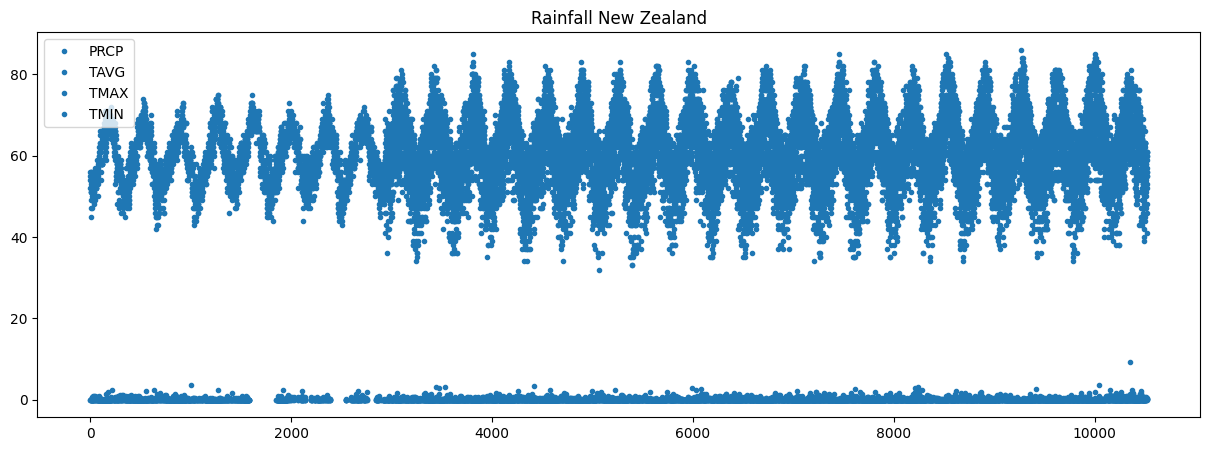

In [349]:
noaaData.plot(style='.', figsize=(15,5), color=color_pal[0], title='Rainfall New Zealand')
plt.show()

In [350]:
noaaData.index

RangeIndex(start=0, stop=10521, step=1)

In [351]:
noaaData.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

<Axes: title={'center': 'Rainfall Auckland 1994 to 2023 (NOAA)'}, xlabel='Year', ylabel='Rainfall'>

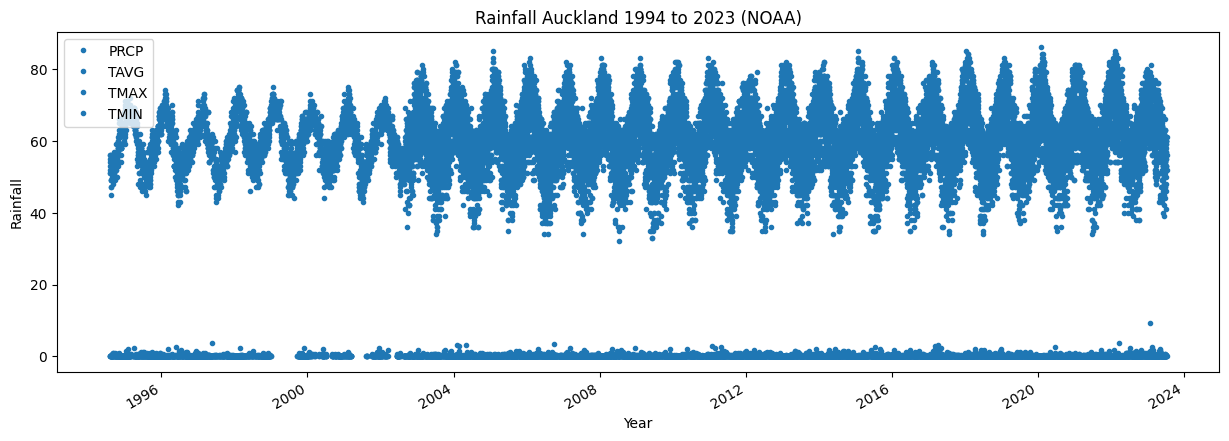

In [352]:
noaaData = noaaData.set_index('DATE')
noaaData.index = pd.to_datetime(noaaData.index)
noaaData.plot(style='.', figsize=(15,5), color = color_pal[0], title='Rainfall Auckland 1994 to 2023 (NOAA)', xlabel="Year", ylabel='Rainfall')

Tras/ Test/ Split

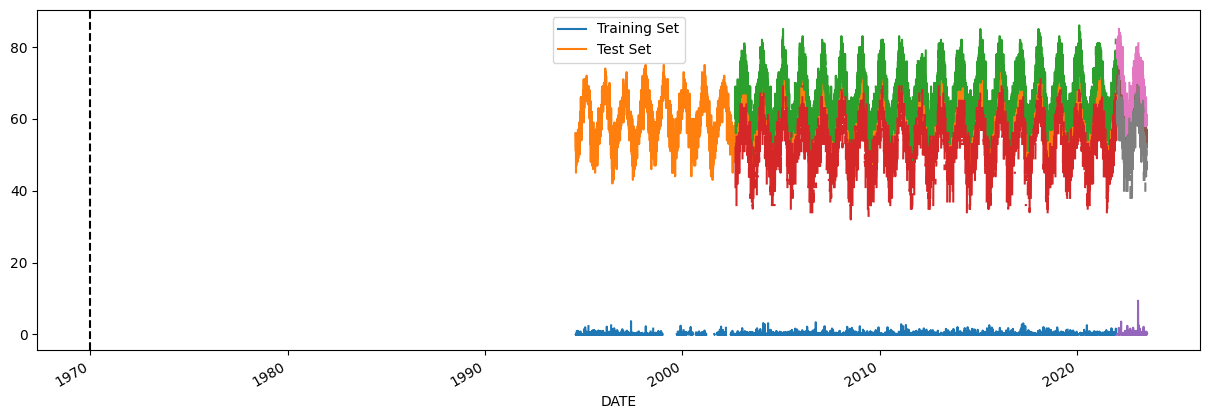

In [353]:
train = noaaData.loc[noaaData.index < '2021-12-31']
test = noaaData.loc[noaaData.index >= '2021-12-31']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label="Training Set")
test.plot(ax=ax, label="Testing Set")
ax.axvline( color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

look for 1 week of data

<Axes: title={'center': 'Week of Data'}, xlabel='DATE'>

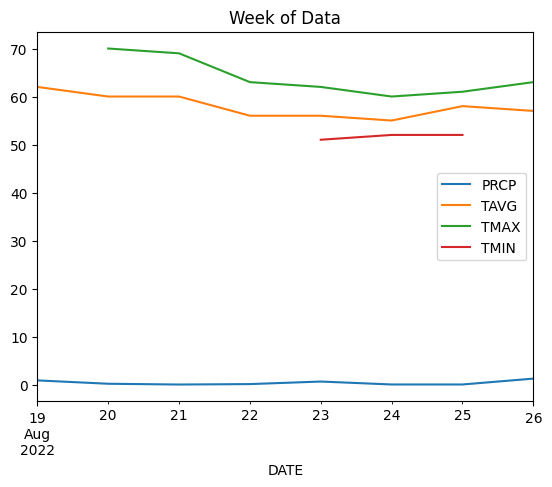

In [354]:
noaaData.loc[(noaaData.index > '2022-08-18') & (noaaData.index < '2022-08-27')].plot(title='Week of Data')

Feature Creation

In [355]:
noaaData.index.min


<bound method Index.min of DatetimeIndex(['1994-08-02', '1994-08-03', '1994-08-04', '1994-08-05',
               '1994-08-06', '1994-08-07', '1994-08-08', '1994-08-09',
               '1994-08-10', '1994-08-11',
               ...
               '2023-07-03', '2023-07-04', '2023-07-05', '2023-07-06',
               '2023-07-07', '2023-07-08', '2023-07-09', '2023-07-10',
               '2023-07-11', '2023-07-12'],
              dtype='datetime64[ns]', name='DATE', length=10521, freq=None)>

Create features

In [357]:
from datetime import datetime, timedelta


soilMoisture = pd.read_csv('./data/ACC-SoilMoisture-MtAlbertGrammarRain_20220818-20230818hour.csv')
rainMtAlbert = pd.read_csv('./data/ACC-Rain-AlbertParkAccRainfall_20220818-20230818-onemins.csv')
# df = pd.merge( rainMtAlbert, soilMoisture)
# df
soilMoisture = soilMoisture.set_index('Timestamp')
soilMoisture.index = pd.to_datetime(soilMoisture.index)
# soilMoisture.index
# soilMoisture = soilMoisture.set_index('Timestamps')
# soilMoisture.index =datetime(soilMoisture.index)
soilMoisture.index.hour


Index([14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       ...
        5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype='int32', name='Timestamp', length=8761)

In [ ]:
def create_features(noaaData):
    '''
    Create time series features based on time series index
    '''
    noaaData['hour'] = df.index.hour
    noaaData['dayofweek'] = df.index.dayofweek
    noaaData['quarter'] = df.index.quarter
    noaaData['month'] = df.index.month
    noaaData['year'] = df.index.year
    noaaData['dayofyear'] = df.index.dayofyear
    return df

df = create_features(df)

AttributeError: 'RangeIndex' object has no attribute 'hour'

Visualize our feature / Target Relationship

ValueError: Could not interpret input 'hour'

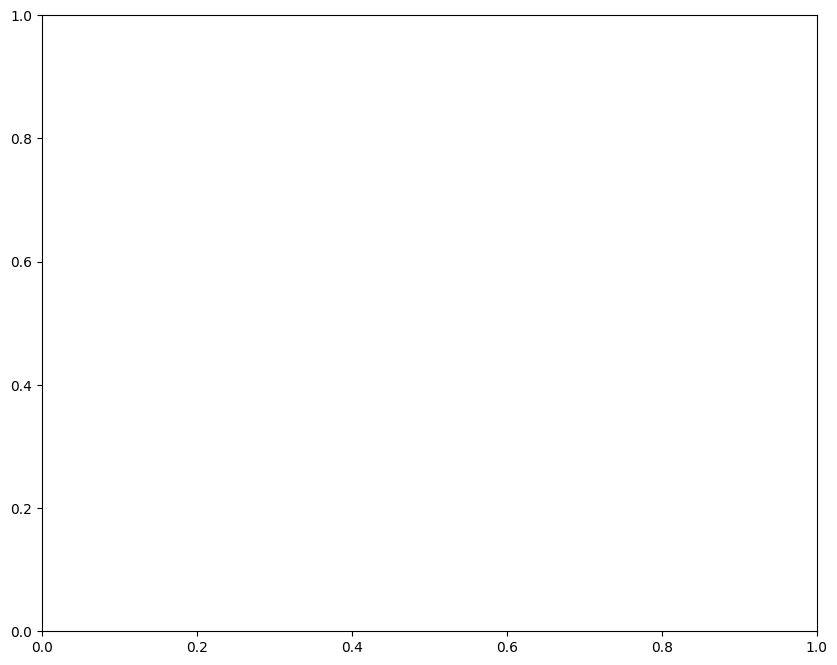

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=noaaData, x='hour', y='Rainfall (mm)')
ax.set_title('Rainfall data at Mt Albert')
plt.show()